# Выявить невыгодные источники трафика и перераспределить бюджет
## 1. Описание проекта
    Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
        лог сервера с данными о посещениях сайта Яндекс.Афиши,
        выгрузка всех заказов за этот период,
        статистика рекламных расходов.
    Небходимо изучить:
        как клиенты пользуются сервисом,
        когда делают первые покупки на сайте,
        сколько денег приносит компании каждый клиент,
        когда расходы на привлечение клиента окупаются.
    Выручка измеряется в условных единицах — у.е.  
    

## 2. Загрузить данные и подготовить их к анализу
### 2.1 Положить данные о визитах, заказах и рекламных расходах в переменные;
### 2.2 Подготовить данные. Убедиться, что тип данных во всех колонках соответствует сохранённым в них значениям.
* **Пути к файлам:**
    * визиты: /datasets/visits_log.csv
    * заказы: /datasets/orders_log.csv
    * расходы: /datasets/costs.csv
    
### 2.3 Рассчитать метрики и построить графики
* **Посчитать метрики трёх видов:**
    * продуктовые,
    * метрики электронной коммерции,
    * маркетинговые.  
    
Отобразить на графиках изменения каждой метрики во времени. Подобрать наиболее подходящий тип визуализации.

Сформулировать выводы.  

## 3. Рассчеты  метрик
### 3.1 Продуктовые метрики
* Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период;
* Определить, сколько раз за день пользователи в среднем заходят на сайт;
* Исследовать, сколько времени пользователи проводят на сайте. Узнать продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построить график распределения. Изменение продолжительности сессий во времени изучать необязательно;
* Рассчитать Retention Rate, применяя когортный анализ. Найти средний Retention Rate на второй месяц «жизни» когорт.

### 3.2 Метрики электронной коммерции
* Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. Изучить изменение этой метрики во времени необязательно;
* Применяя когортный анализ или другой метод, рассчитать среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучить изменение этой метрики во времени необязательно;
* Рассчитать средний чек;
* Выяснить, как меняется во времени LTV на покупателя по когортам. LTV — накопительная метрика. Рассчитать средний LTV по когортам за 6 месяцев; в расчёт включать когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

### 3.3 Маркетинговые метрики

Посчитать и отобразить на графиках, как маркетинговые метрики различаются по рекламным источникам.  

Один и тот же пользователь мог заходить на сайт из нескольких источников, поэтому важно определить «главный» источник для каждого и учитывать это в расчётах. Например, главным может стать первый источник перехода.  
* Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам;
* Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика;
* Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт. Обратить внимание, что клиенты, пришедшие из разных источников, могут иметь разный LTV.

## 4. Сформулировать выводы и рекомендации
* Определить источники трафика, на которые маркетологам стоит делать упор. Объяснить свой выбор: на какие метрики вы ориентируетесь и почему;
* Описать выводы, которые вы сделали после подсчёта метрик каждого вида: маркетинговых, продуктовых и метрик электронной коммерции;
* Подвести итоги когортного анализа. Определить самые перспективные для компании когорты клиентов;

## 2.1 Загрузить данные и подготовить их к анализу
### Положить данные о визитах, заказах и рекламных расходах в переменные

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# настройка отображения
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

visits.name = 'visits'
orders.name = 'orders'
costs.name = 'costs'

file_list = [visits, orders, costs]

### Подготовить данные. Убедиться, что тип данных во всех колонках соответствует сохранённым в них значениям

In [4]:
# функция выводящая общую информацию по каждому файлу
def general_info(list):
    
    for file in file_list:
        print('-' * 100, '\n')
        print(file.name)
        file.columns = map(str.lower, file.columns)
        display(file.info())
        display(file.describe().T)
        
        # данный блок исправляет ошибку, которая не позволяет выводит количество строк больше,
        # чем количество строк в самом дата фрейме
        if file.shape[0] > 10:
            display(file.sample(10))
        else:
            display(file.sample(file.shape[0]))

        
general_info(file_list)

---------------------------------------------------------------------------------------------------- 

visits
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end ts       359400 non-null object
source id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


None

,count,mean,std,min,25%,50%,75%,max
source id,"359,400.00",3.75,1.92,1.00,3.00,4.00,5.00,10.00
uid,"359,400.00","9,202,556,994,354,921,472.00","5,298,432,824,659,611,648.00","11,863,502,262,781.00","4,613,406,732,167,550,976.00","9,227,412,908,740,601,856.00","13,728,237,011,236,173,824.00","18,446,676,030,785,673,216.00"


,device,end ts,source id,start ts,uid
130622,desktop,2017-07-14 14:00:00,4,2017-07-14 13:47:00,5857639499727396836
221917,desktop,2017-12-21 14:50:00,2,2017-12-21 14:25:00,12869801667763685675
78293,touch,2018-04-21 00:16:00,1,2018-04-21 00:10:00,1739089103568485723
150330,touch,2017-12-23 22:05:00,4,2017-12-23 21:47:00,6411620390834361635
86808,touch,2018-03-03 20:18:00,5,2018-03-03 19:49:00,3040905705016640057
96658,desktop,2017-10-28 09:53:00,3,2017-10-28 09:50:00,138223974122771021
181097,desktop,2017-10-09 16:58:00,4,2017-10-09 16:46:00,4993332844700587096
15108,desktop,2017-07-04 15:26:00,3,2017-07-04 15:25:00,10467525637044056271
315880,touch,2017-11-08 22:14:00,4,2017-11-08 22:14:00,1182820862796140553
218041,desktop,2017-11-13 17:45:00,1,2017-11-13 17:26:00,16113855509925314557


---------------------------------------------------------------------------------------------------- 

orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null object
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


None

,count,mean,std,min,25%,50%,75%,max
revenue,"50,415.00",5.00,21.82,0.00,1.22,2.50,4.89,"2,633.28"
uid,"50,415.00","9,098,160,634,289,729,536.00","5,285,741,550,834,715,648.00","313,578,113,262,317.00","4,533,566,627,250,599,936.00","9,102,273,602,618,561,536.00","13,682,901,980,465,401,856.00","18,446,167,067,214,817,280.00"


,buy ts,revenue,uid
30782,2018-01-24 11:22:00,0.18,3144173484402389945
32065,2018-01-31 15:01:00,24.44,12780042542370479493
17563,2017-11-14 22:27:00,1.95,11909186699457868400
27401,2017-12-31 17:46:00,4.89,3499533404097471868
599,2017-06-06 15:36:00,4.89,11920452646463905188
43097,2018-04-04 19:56:00,3.42,17506227857429275846
20343,2017-11-26 21:28:00,0.98,1929984892132242900
13751,2017-10-20 15:32:00,1.53,12340712946349020105
26824,2017-12-28 23:14:00,4.89,15405437945777587332
29280,2018-01-13 21:02:00,1.83,3055159613238627965


---------------------------------------------------------------------------------------------------- 

costs
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


None

,count,mean,std,min,25%,50%,75%,max
source_id,"2,542.00",4.86,3.18,1.00,2.00,4.00,9.00,10.00
costs,"2,542.00",129.48,156.30,0.54,21.95,77.30,170.06,"1,788.28"


,source_id,dt,costs
229,1,2018-01-16,82.05
2138,9,2018-04-21,9.75
1734,5,2018-03-10,140.43
2479,10,2018-03-28,9.29
645,2,2018-03-10,109.34
702,2,2018-05-08,60.29
794,3,2017-08-08,225.66
2091,9,2018-03-03,16.80
837,3,2017-09-20,330.87
482,2,2017-09-28,151.35


In [5]:
def check_duplicated(list):
    for file in list:
        print('Количество дубликатов в {}'.format(file.name), file.duplicated().sum())

check_duplicated(file_list)

Количество дубликатов в visits 0
Количество дубликатов в orders 0
Количество дубликатов в costs 0


In [6]:
list_date_columns = [' ts', 'dt']

def cast_to_date(list_date, list_df):
    for name_column in list_date:
        for df in list_df:
            for column in df.columns:
                if name_column in column:
                    df[column] = pd.to_datetime(df[column])
                    print('\n', 'Файл {}'.format(df.name), '\n', 'Колонка {}'.format(column), '\n', df[column].dtype, '\n')

cast_to_date(list_date_columns, file_list)


 Файл visits 
 Колонка end ts 
 datetime64[ns] 


 Файл visits 
 Колонка start ts 
 datetime64[ns] 


 Файл orders 
 Колонка buy ts 
 datetime64[ns] 


 Файл costs 
 Колонка dt 
 datetime64[ns] 



#### Вывод

Данные без пропусков и дубликатов, типы данных исправлены

### Рассчитать метрики и построить графики
#### Продуктовые метрики

In [7]:
column_list = ['session_year', 'session_month', 'session_week', 'session_date']

def create_date_columns(list):
    for date in list:
        if 'year' in date:
            visits[date] = visits['start ts'].dt.year
        elif 'month' in date:
            visits[date] = visits['start ts'].dt.month
        elif 'week' in date:
            visits[date] = visits['start ts'].dt.week
        elif 'date' in date:
            visits[date] = visits['start ts'].dt.date

create_date_columns(column_list)
display(visits.head())

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


* Рассчитать DAU, WAU и MAU. Вычислить средние значения этих метрик за весь период

In [8]:
# рассчет количества уникальных пользователей в день, неделю, месяц
def product_metrics(list):
    for date_session in list:
        if 'date' in date_session:
            dau = visits.groupby(date_session).agg({'uid': 'nunique'}).mean()
            print('Количество уникальных пользователей в день {}'.format(int(dau[0])))
        elif 'week' in date_session:
            wau = visits.groupby(date_session).agg({'uid': 'nunique'}).mean()
            print('Количество уникальных пользователей в неделю {}'.format(int(wau[0])))
        elif 'month' in date_session:
            mau = visits.groupby(date_session).agg({'uid': 'nunique'}).mean()
            print('Количество уникальных пользователей в месяц {}'.format(int(mau[0])))
        else:
            continue


product_metrics(column_list)

Количество уникальных пользователей в месяц 23228
Количество уникальных пользователей в неделю 5825
Количество уникальных пользователей в день 907


* Определить, сколько раз за день пользователи в среднем заходят на сайт

In [9]:
# number_visits = visits['session_date'].count() / visits['uid'].nunique()
visits_per_day = visits.groupby('session_date').agg({'uid':['count','nunique']}).reset_index()
visits_per_day.columns = ['session_date','session','users']

visits_per_day['session_per_users'] = visits_per_day['session'] / visits_per_day['users']
print(visits_per_day)

print('Количество посещений в день {:.2f}'.format(visits_per_day['session_per_users'].mean()))

    session_date  session  users  session_per_users
0     2017-06-01      664    605               1.10
1     2017-06-02      658    608               1.08
2     2017-06-03      477    445               1.07
3     2017-06-04      510    476               1.07
4     2017-06-05      893    820               1.09
..           ...      ...    ...                ...
359   2018-05-27      672    620               1.08
360   2018-05-28     1156   1039               1.11
361   2018-05-29     1035    948               1.09
362   2018-05-30     1410   1289               1.09
363   2018-05-31     2256   1997               1.13

[364 rows x 4 columns]
Количество посещений в день 1.08


* Исследовать, сколько времени пользователи проводят на сайте

Продолжительность сессии по моде 60 сек
Средняя продолжительность сессии 714 сек


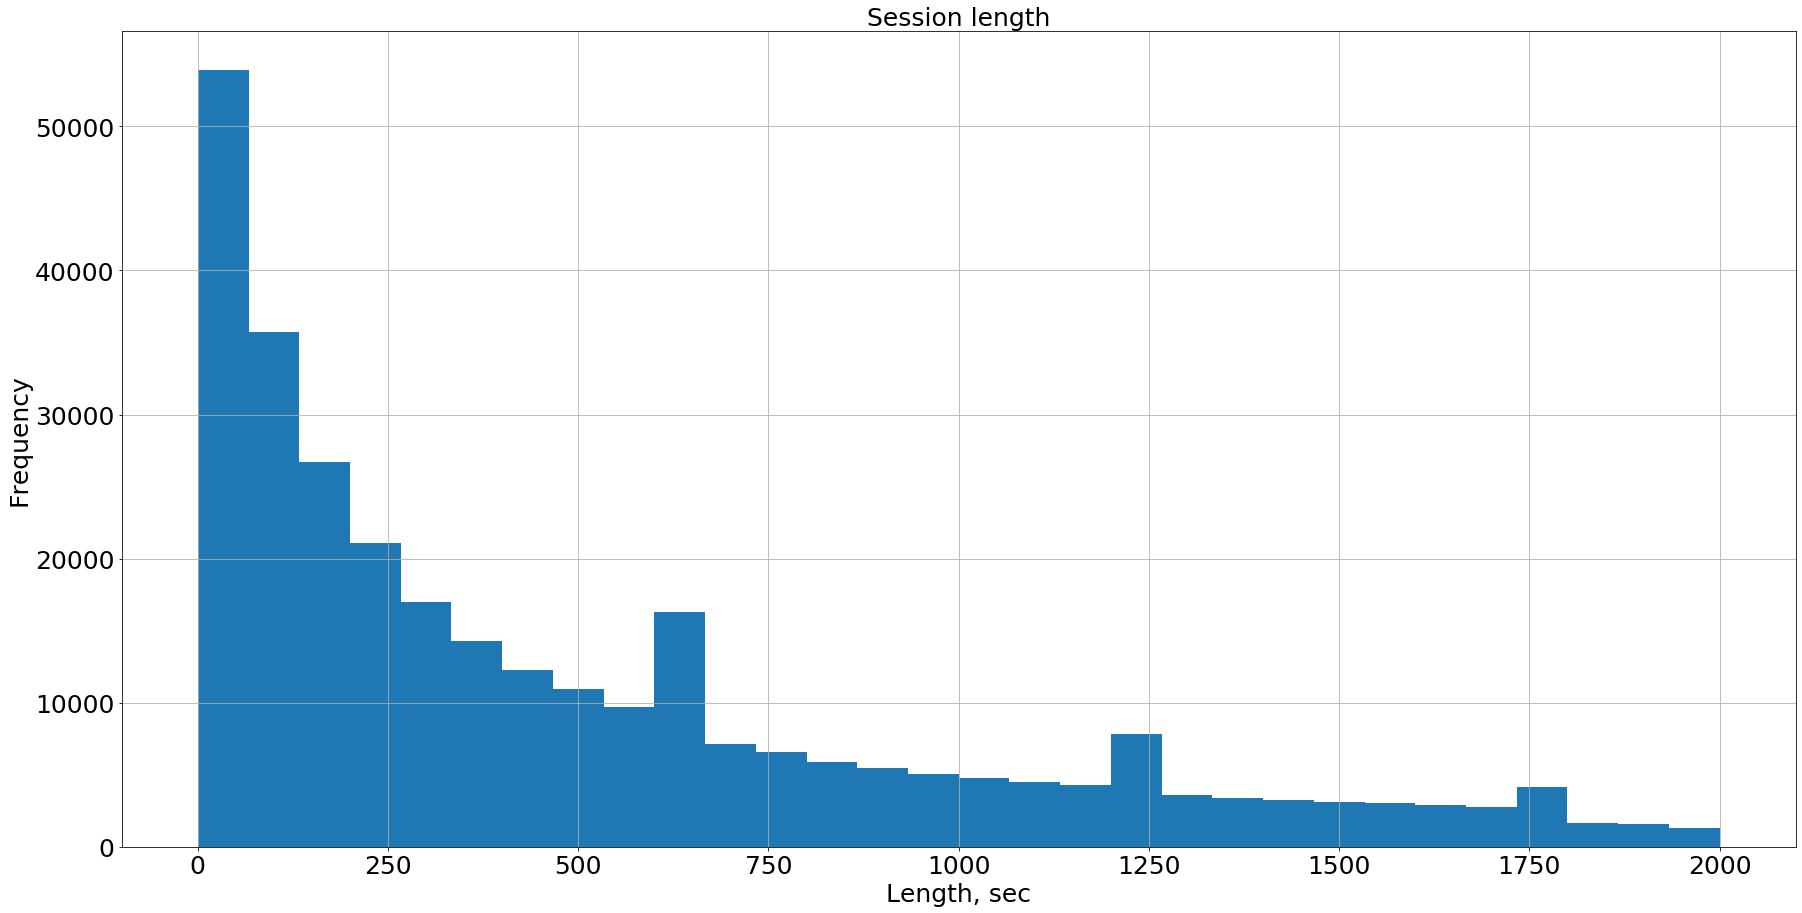

In [10]:
# строим график
def build_graph(data, column, **kwargs):
    if kwargs['graph_kind'].isdigit():
        data[column].hist(bins=kwargs['bins'], range=kwargs['graph_range'], figsize=(30, 15), xlabelsize=25, ylabelsize=25)
        plt.title(kwargs['title'], fontsize=25)
        plt.xlabel(kwargs['x'], fontsize=25)
        plt.ylabel(kwargs['y'], fontsize=25)
    else:
        data[column].plot(title=kwargs['title'], fontsize=25, legend=True,\
                            kind=kwargs['graph_kind'], figsize=(30, 15)).title.set_size(25)
        plt.xlabel(kwargs['x'], fontsize=25)
        plt.ylabel(kwargs['y'], fontsize=25)


# считаем длину сессии
def calculate_session_length(data):
    data['session_length'] = (data['end ts'] - data['start ts']).dt.seconds
    if data['session_length'].min() < 1:
        data = data.query('session_length > 0')
        build_graph(data, 'session_length',  graph_kind='0', bins=30, graph_range=(0, 2000),\
                    title='Session length', x='Length, sec', y='Frequency')
        asl_mode = data['session_length'].mode()
        print('Продолжительность сессии по моде {} сек'.format(asl_mode[0]))
        asl_mean = data['session_length'].mean()
        print('Средняя продолжительность сессии {} сек'.format(int(asl_mean)))
    else:
        build_graph(data, 'session_length',  graph_kind='0', bins=30, graph_range=(0, 2000),\
                    title='Session length', x='Length, sec', y='Frequency')
        asl_mode = data['session_length'].mode()
        print('Продолжительность сессии по моде {} сек'.format(asl_mode[0]))
        asl_mean = data['session_length'].mean()
        print('Средняя продолжительность сессии {} сек'.format(int(asl_mean)))

calculate_session_length(visits)

* Рассчитать Retention Rate, применяя когортный анализ. Найти средний Retention Rate на второй месяц «жизни» когорт.

In [11]:
# находим первый день активности пользователя и объеденяем 2 таблицы
first_activity_date = visits.groupby(['uid'])['start ts'].min()
first_activity_date.name = 'first_activity_date'
visits = visits.join(first_activity_date, on='uid')

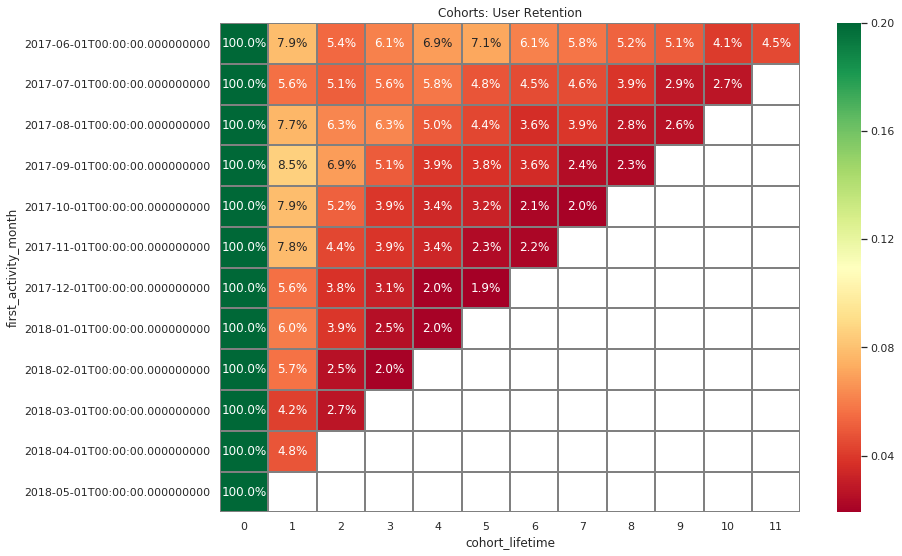

In [12]:
# преобразуем типы данных
visits['first_activity_month'] = visits['first_activity_date'].astype('datetime64[M]')
visits['activity_month'] = visits['start ts'].astype('datetime64[M]')

# формируем когорты
visits['cohort_lifetime'] = visits['activity_month'] - visits['first_activity_month']
visits['cohort_lifetime'] = visits['cohort_lifetime'] / np.timedelta64(1, 'M')
visits['cohort_lifetime'] = visits['cohort_lifetime'].round().astype('int')
cohorts = visits.groupby(['first_activity_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})
cohorts = cohorts.merge(initial_users_count, on='first_activity_month')

# считаем retention
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

# формируем таблицу с User retention по когортам
retention_pivot = cohorts.pivot_table(
    index='first_activity_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
) 


# строим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='RdYlGn', vmax=.2)

**Вывод:**
* После первого месяца наблюдается сильный отток пользователей
* Возвращается малый процент пользователей, с каждым месяцем он все меньше

#### Метрики электронной коммерции

* Исследовать, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

In [13]:
first_orders_date = orders.groupby('uid').agg({'buy ts':'min'})
first_orders_date.name = 'first_orders_date'
visits = visits.merge(first_orders_date, on='uid')

In [14]:
visits['visits_to_bay_sec'] = (visits['buy ts'] - visits['first_activity_date']).dt.seconds
print('В среднем проходит с момента первого посещения сайта до совершения покупки {}'\
      .format(visits['visits_to_bay_sec'].mean()))
print('Медиана с момента первого посещения сайта до совершения покупки равна {}'\
      .format(visits['visits_to_bay_sec'].median()))
print('Мода с момента первого посещения сайта до совершения покупки равна {}'\
      .format(visits['visits_to_bay_sec'].mode()[0]))

В среднем проходит с момента первого посещения сайта до совершения покупки 24750.075158634
Медиана с момента первого посещения сайта до совершения покупки равна 7920.0
Мода с момента первого посещения сайта до совершения покупки равна 0


In [15]:
visits = visits[visits['visits_to_bay_sec'] != 0]
print('В среднем проходит с момента первого посещения сайта до совершения покупки {}'\
      .format(visits['visits_to_bay_sec'].mean()))
print('Медиана с момента первого посещения сайта до совершения покупки равна {}'\
      .format(visits['visits_to_bay_sec'].median()))
print('Мода с момента первого посещения сайта до совершения покупки равна {}'\
      .format(visits['visits_to_bay_sec'].mode()[0]))

В среднем проходит с момента первого посещения сайта до совершения покупки 26193.495604550837
Медиана с момента первого посещения сайта до совершения покупки равна 9720.0
Мода с момента первого посещения сайта до совершения покупки равна 60


**Вывод:**
- польлзователи время которых от визита до покупки = 0, говорит о том, что скорей всего переход был сразу на страницу покупки с внешних ресурсов
- в среднем время составляет 34551 сек (возможно отложеныя покупка, т.е. увидили интересный концерт, шоу, билет положили в корзину, но не оплатили, копили деньги, ждали даты проведения мероприятия)
- чаще всего люди совершают покупку через 60 сек

* Рассчитать среднее количество покупок на одного покупателя за определённый период

In [16]:
# уберем нулевые продажи
orders = orders[orders['revenue'] != 0]

first_order_date = orders.groupby(['uid'])['buy ts'].min()
first_order_date.name = 'first_order_date'
orders = orders.join(first_order_date, on='uid')

In [17]:
orders['first_order_date'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

# формируем когорты
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_date']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

mean_count_revenue = (orders[orders['cohort_lifetime'] <= 6]['revenue'].count() /
                      orders[orders['cohort_lifetime'] <= 6]['uid'].nunique())
print('Среднее количество покупок на одного покупателя за период 6 месяцев {:.2f}'\
      .format(mean_count_revenue))

Среднее количество покупок на одного покупателя за период 6 месяцев 1.34


* Рассчитать средний чек

In [18]:
mean_check = orders['revenue'].mean()
print('Средний чек {:.2f}'.format(mean_check))

Средний чек 5.00


* Выяснить, как меняется во времени LTV на покупателя по когортам. LTV — накопительная метрика. Рассчитать средний LTV по когортам за 6 месяцев; в расчёт включать когорты, «прожившие» не менее 6 месяцев. Маржинальность сервиса — 100%.

In [19]:
margin_rate = 1

costs['costs_month'] = costs['dt'].astype('datetime64[M]')
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_date']

cohort_sizes = (
    first_orders.groupby('first_order_date')
    .agg({'uid': 'nunique'})
    .reset_index()
)

cohort_sizes.columns = ['first_order_date', 'n_buyers']

cohorts = (
    orders.groupby(['first_order_date', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)

report = pd.merge(cohort_sizes, cohorts, on='first_order_date')

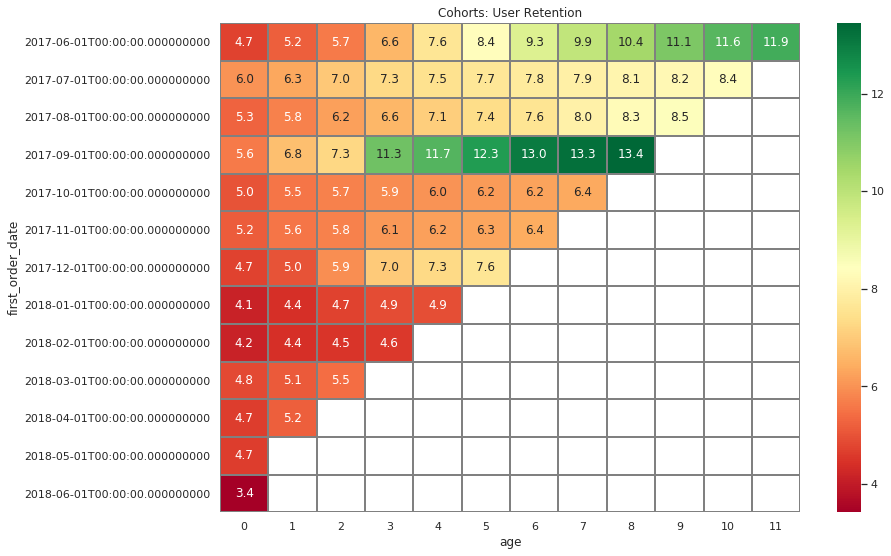

In [20]:
report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['order_month'] - report['first_order_date']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_date', columns='age', values='ltv', aggfunc='mean'
)

output_cum = output.cumsum(axis=1)
output_cum

# строим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(output_cum, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='RdYlGn')

In [21]:
six_month_lived = output.cumsum(axis=1).mean(axis=0)
six_month_lived.loc[6:]

age
6     8.39
7     9.09
8    10.07
9     9.26
10   10.01
11   11.88
dtype: float64

#### Маркетинговые метрики

* Посчитать общую сумму расходов на маркетинг. Выяснить, как траты распределены по источникам

In [22]:
print('Всего не маркетинг потрачено {:.2f}'.format(costs['costs'].sum()))

Всего не маркетинг потрачено 329131.62


In [23]:
costs_by_source_id = costs.groupby('source_id').agg({'costs':'sum'})
costs_by_source_id

,costs
source_id,
1,"20,833.27"
2,"42,806.04"
3,"141,321.63"
4,"61,073.60"
5,"51,757.10"
9,"5,517.49"
10,"5,822.49"


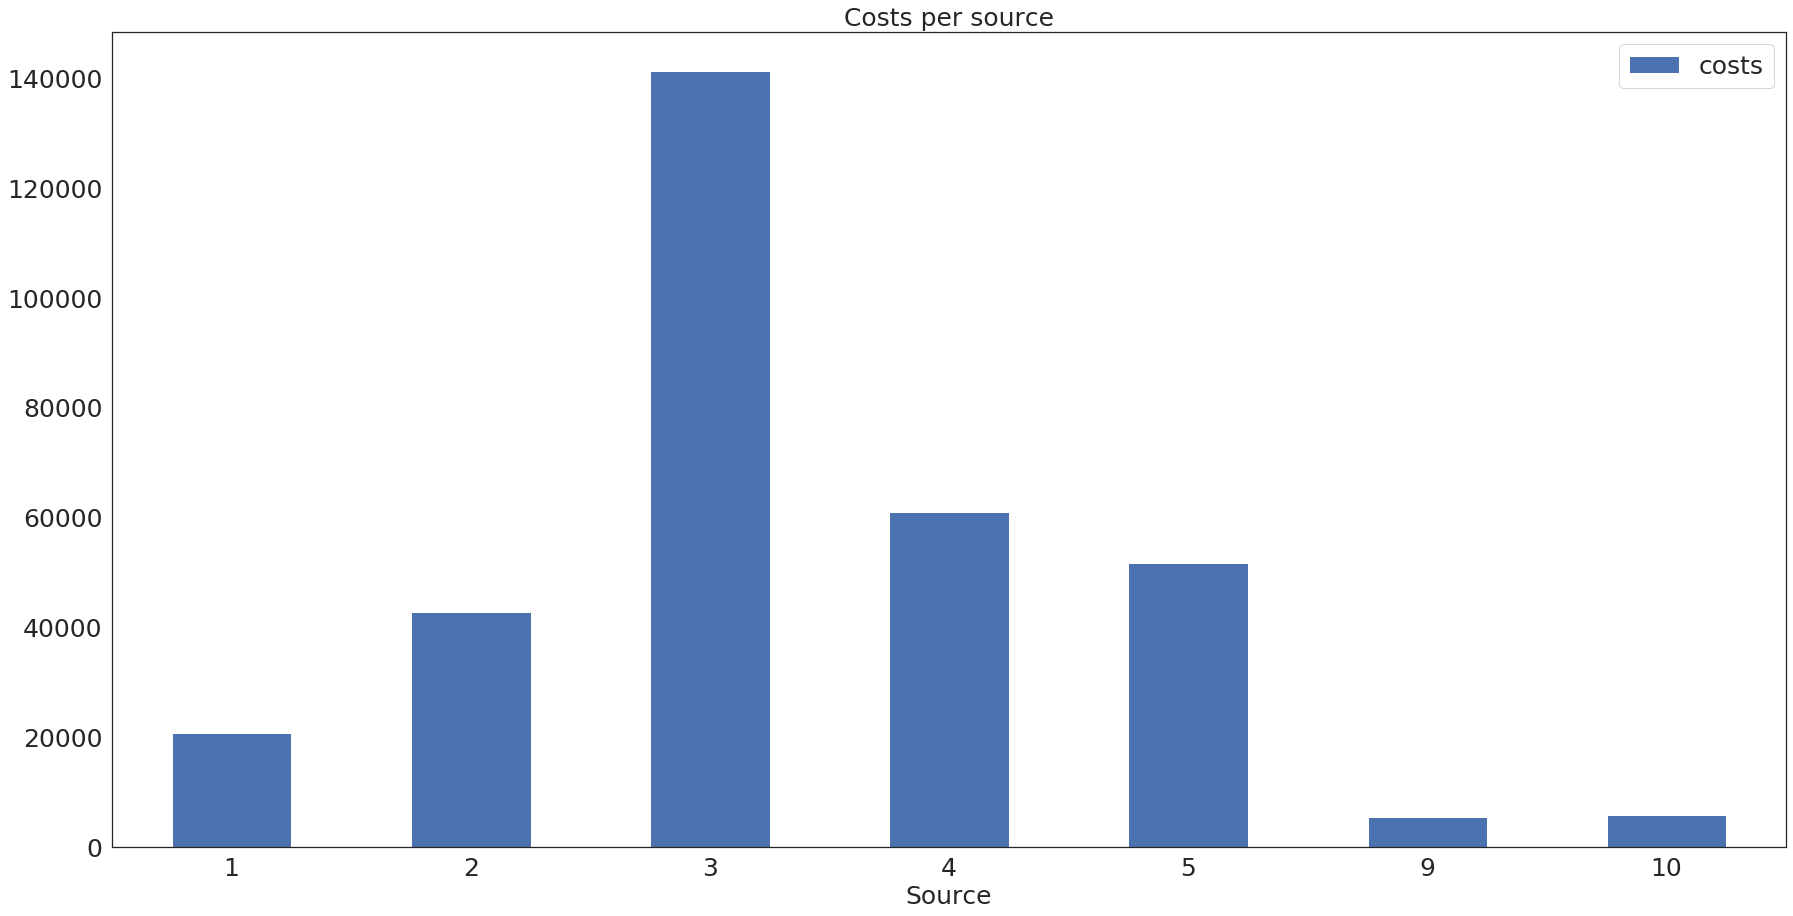

In [24]:
costs_by_source_id.reset_index().plot.bar(x='source_id', y='costs', rot=0, figsize=(30, 15), fontsize=25)
plt.title('Costs per source', fontsize=25)
plt.xlabel('Source', fontsize=25)
plt.legend(fontsize=25)

Наибольшие траты пришлись на источник 3

* Рассчитать средний CAC на одного покупателя для всего проекта и для каждого источника трафика

In [25]:
monthly_costs = costs.groupby('costs_month').sum()

visits_for_source = visits[['uid', 'source id', 'start ts', 'first_activity_date', 'first_activity_month']]
visits_for_source = visits_for_source[visits_for_source['start ts'] == visits_for_source['first_activity_date']]
visits_for_source = visits_for_source.merge(orders.groupby('uid').agg({'revenue':'sum'}), on='uid', how='left')
visits_for_source = visits_for_source.rename(columns={'source id': 'source_id', 'first_activity_month': 'costs_month'})

In [26]:
source_to_cohorts = visits_for_source.groupby(['source_id', 'costs_month'], as_index=False)\
.agg({'uid':'count', 'revenue':'sum'})
source_to_cohorts.columns = ['source_id', 'costs_month', 'buyers', 'revenue']
source_to_cohorts = source_to_cohorts.merge(costs.groupby(['source_id', 'costs_month'], as_index=False).agg({'costs':'sum'}),
                                            on=['source_id', 'costs_month'])
source_to_cohorts['cac'] = source_to_cohorts['costs'] / source_to_cohorts['buyers']
print('Средний CAC на одного покупателя для всего проекта {:.2f}'.format(source_to_cohorts['costs'].sum() /
                                                                         source_to_cohorts['buyers'].sum()))

Средний CAC на одного покупателя для всего проекта 9.66


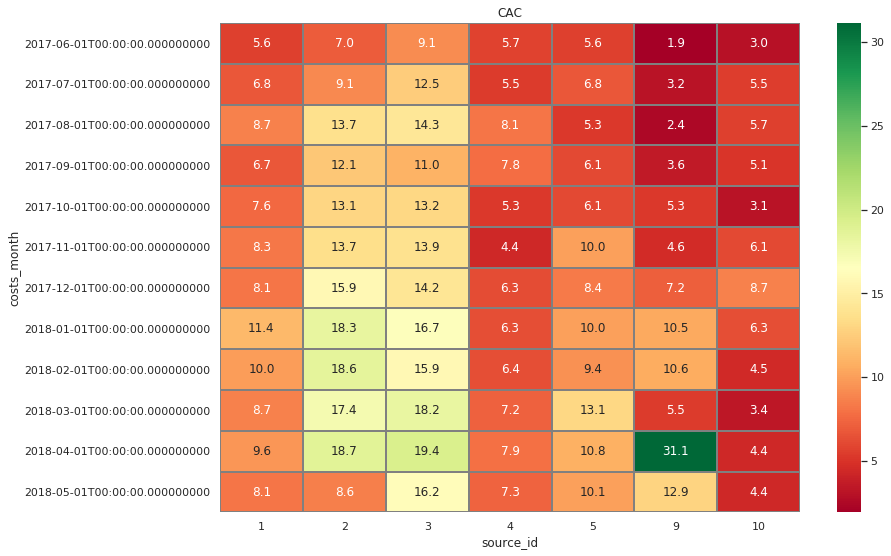

In [27]:
source_to_cohorts_pivot = source_to_cohorts.pivot_table(index='costs_month',
                                                        columns='source_id',
                                                        values='cac',
                                                        aggfunc='sum')


# строим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('CAC')
sns.heatmap(source_to_cohorts_pivot, annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='RdYlGn')
plt.show()

* Рассчитать ROMI по когортам в разрезе источников. Сравнить окупаемость за одинаковые периоды жизни когорт.

In [28]:
costs_month = costs.groupby('costs_month')['costs'].sum()
report_new = report.merge(costs_month, left_on='first_order_date', right_on='costs_month')

In [29]:
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new['romi'] = report_new['ltv'] / report_new['cac']
pivot_romi = report_new.pivot_table(index='first_order_date', columns='age', values='romi')
pivot_romi = pivot_romi.cumsum(axis=1)

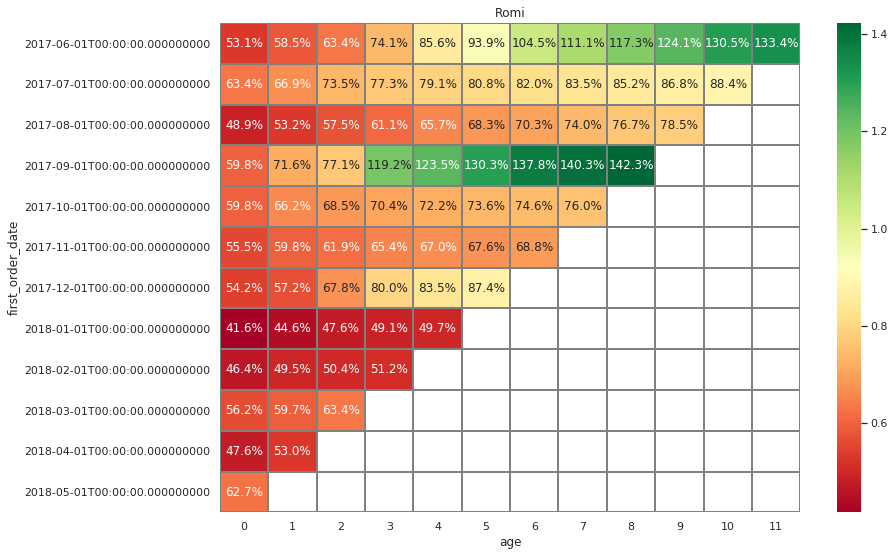

In [30]:
# строим тепловую карту
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Romi')
sns.heatmap(pivot_romi, annot=True, fmt='.1%', linewidths=1, linecolor='gray', cmap='RdYlGn')

In [31]:
visit_source = visits.groupby('uid').agg({'source id':'first'})
visit_source = visit_source.rename(columns={'source id': 'source_id'})
orders_source = orders.merge(visit_source, on='uid')
orders_source = orders_source.rename(columns={'first_order_date': 'dt'})
orders_source

,buy ts,revenue,uid,dt,order_month,cohort_lifetime,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,0,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,0,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,0,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,0,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,0,3
...,...,...,...,...,...,...,...
46437,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-01,0,4
46438,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-01,0,10
46439,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-01,0,3
46440,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-01,0,4


In [32]:
costs_and_orders = pd.merge(orders_source, costs, on=['dt', 'source_id'])
costs_and_orders = costs_and_orders.drop(['cohort_lifetime'], axis='columns')

In [33]:
def romi_by_source(source):
    cohorts_costs_orders = costs_and_orders[costs_and_orders['source_id'] == source].groupby(['dt', 'order_month']).agg({'revenue':'sum', 'costs':'sum'}).reset_index()
    
    cohorts_costs_orders['cohort_lifetime'] = ((cohorts_costs_orders['order_month'] - cohorts_costs_orders['dt']) / np.timedelta64(1, 'M')).round()
    cohort_sizes = (
    first_orders.groupby('first_order_date')
    .agg({'uid': 'nunique'})
    .reset_index()
    )
    cohort_sizes.columns = ['first_order_date', 'n_buyers']
    cohorts_costs_orders = cohorts_costs_orders.rename(columns={'dt': 'first_order_date'})
    report = pd.merge(cohort_sizes, cohorts_costs_orders, on='first_order_date')
    report['revenue_per_bayer'] = report['revenue'] / report['n_buyers']
    report['cac'] = report['costs'] / report['n_buyers']
    report['roi'] = report['revenue_per_bayer'] / report['cac']
    
    report_table = report.pivot_table(
        index='first_order_date',
        columns='cohort_lifetime',
        values='roi',
        aggfunc='sum'
    ).cumsum(axis=1).round(2)
    return report_table

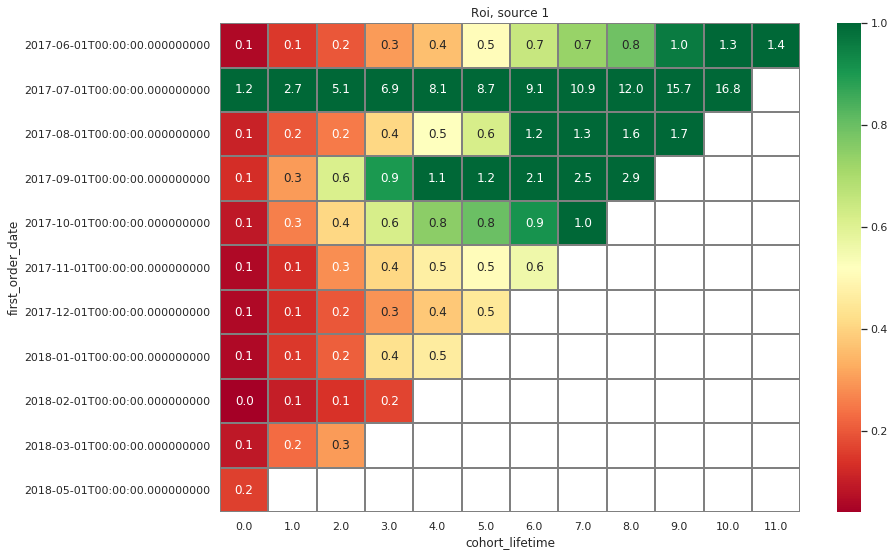

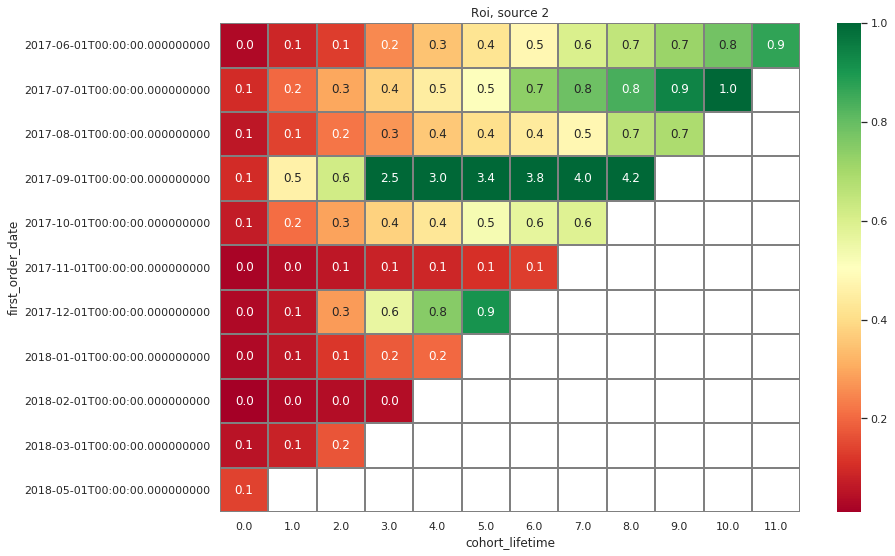

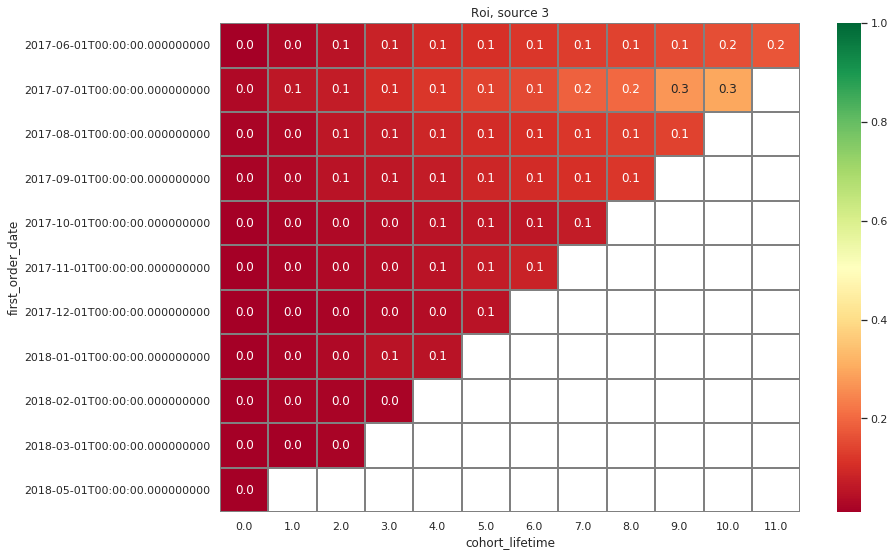

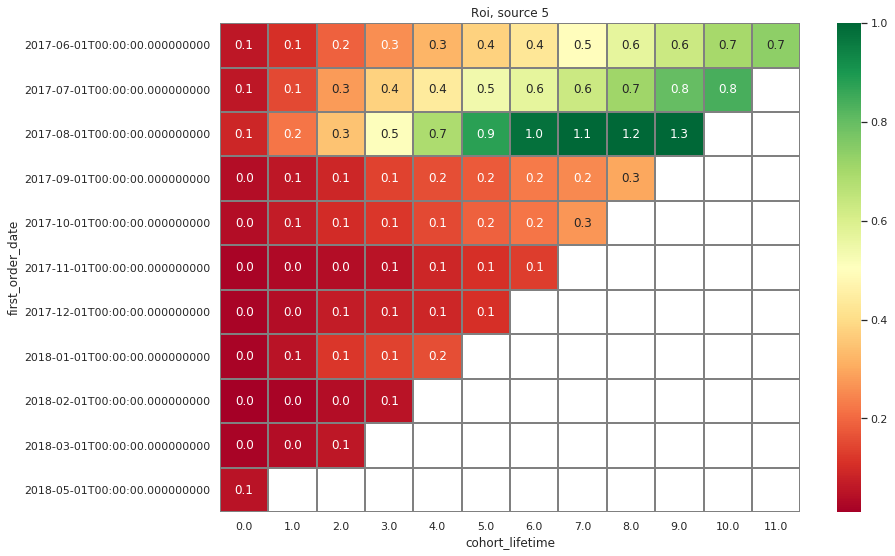

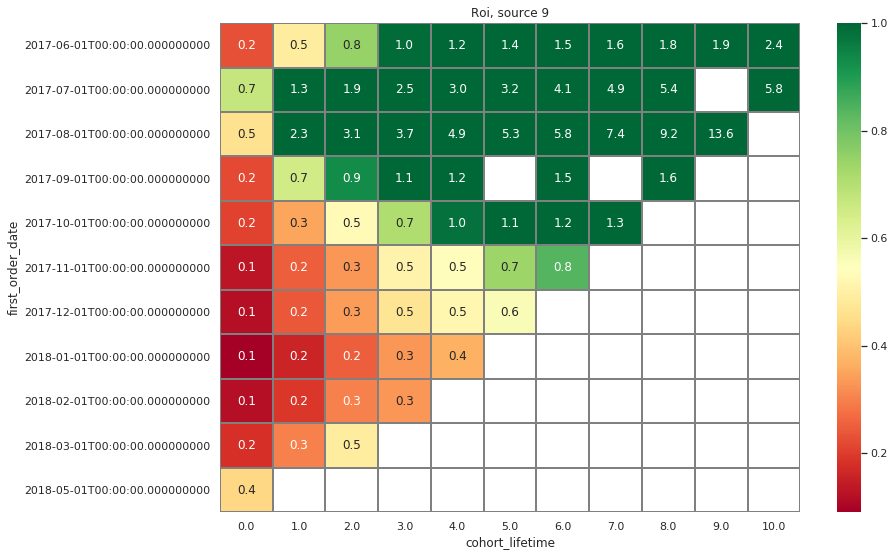

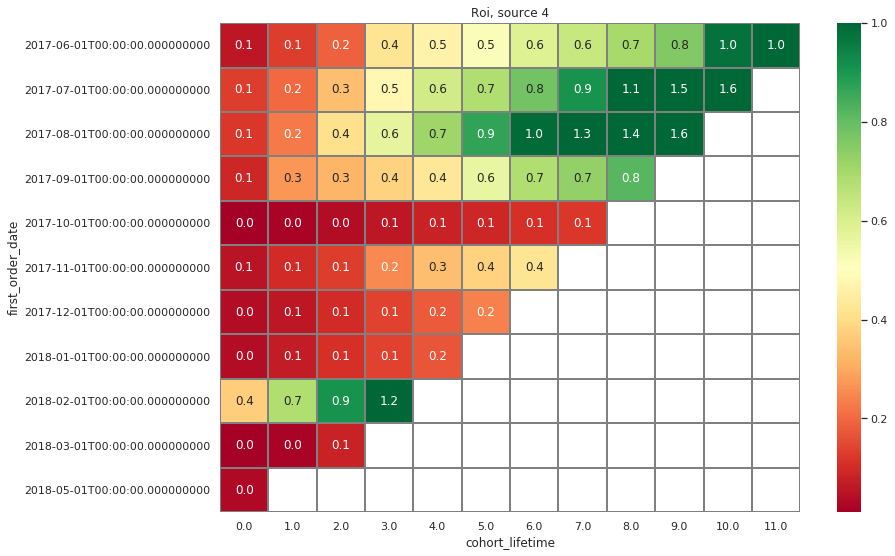

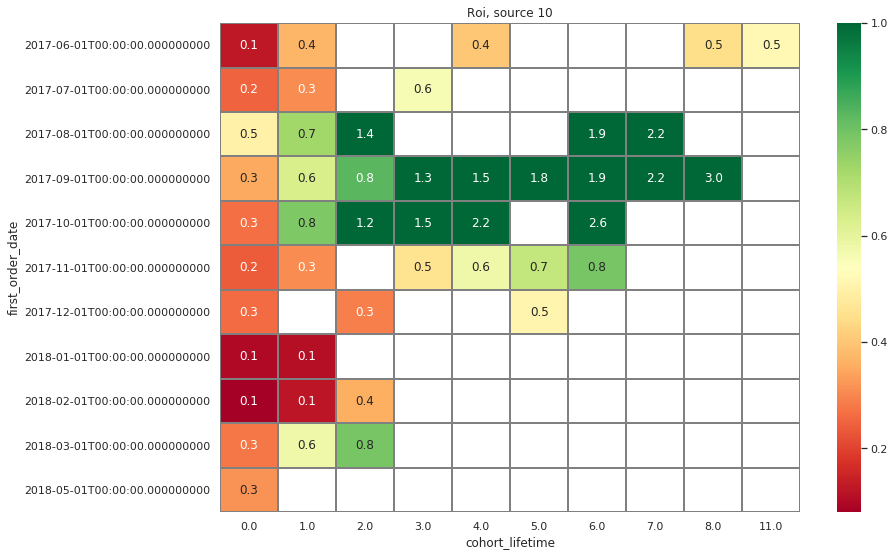

In [34]:
numbers = list(costs_and_orders['source_id'].unique())

# строим тепловую карту
for source_number in numbers:
    
    sns.set(style='white')
    plt.figure(figsize=(13, 9))
    plt.title('Roi, source {}'.format(source_number))
    sns.heatmap(romi_by_source(source_number), annot=True, fmt='.1f', linewidths=1, linecolor='gray', cmap='RdYlGn', vmax=1)

**Выводы:**  
    1. Сервис работал в убыток  
    2. Коэфициент удержания небольшой  
    3. Средний чек равен 5, довольно неплохой показатель  
    4. Большинство пользователей совершают покупку в течении минуты, скорей всего это постоянные пользователи, либо те кто знает, какую покупку хотят совершить. В среднем проходит около 12 минут.  
    5. Окупились следующие источники: 1, 2, 5, 9. 3 источник самый убыточный  

**Рекомендации:**  
    1. Исключить источники, которые не окупились, либо перераспределить затраты с неокупаемых источников на 1, 2, 5  
    2. Решить проблему с удержанием ползователей